# Homework 1
## Introduction
### Important dates
* Homework release: Thursday, 3rd October 2019
* **Homework due**: Wednesday, 16th October 2019 (23:59 hours, 11:59 PM)
* Peer review due: Wednesday, 23rd October 2019 (23:59 hours, 11:59 PM)
* Grading release: Wednesday, 30th October 2019

### Description

The data you'll be working with comes from multiple sources. The main data source will be [DBLP](https://dblp.uni-trier.de/), a database of publications from major computer science journals and conferences. A subset of DBLP, which you will use in this assignment, is provided to you via a [google drive folder](https://drive.google.com/file/d/1Kci8joML74tCSzuBbhxtd1ylR4f0dlm6/view). Later on, you will enrich the DBLP data with a dataset on conference rankings and with the proceedings of the [NIPS conference](https://nips.cc/) [1] ('proceedings' is another word for the set of papers published at an academic conference). After loading and cleaning the data, you will answer various questions about its contents.

**Some rules:**
- You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you have to justify your choice.
- Make sure you use the data folder provided in the repository in *read-only* mode.
- Be sure to provide explanations for your answers. A notebook that only has code cells will not suffice.
- Also, be sure to *hand in a fully-run and evaluated notebook*. We will not run your notebook for you, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.

[1] Note that NIPS was renamed to NeurIPS in 2018, but for simplicity, whenever we say 'NIPS', we really mean 'NIPS and NeurIPS'.

## Task A. Getting a sense of the dataset

### A1. Loading the data
Download the DBLP dataset (available on [google drive](https://drive.google.com/file/d/1Kci8joML74tCSzuBbhxtd1ylR4f0dlm6/view)) and load it into a Pandas dataframe. A row of your dataframe should look as follows:

| paper id | author names | publication year | paper title | 
| :----:|:-------------:| :-----:|:-----:|
| conf/nips/doe1036 | [John Doe, Jane Doe] | 2003 | Some Catchy Title: An Expanded and Boring Title | 


1. Filter the papers: keep only conference papers. For each of the remaining ones, find the acronym of the conference where it was published. Retain only those papers that have been published in the conferences listed in `data/list_of_ai_conferences.txt`. Additionally, add a column named 'conference' to your dataframe.   
_Hint: The `paper id` tells you whether a paper was published at a conference, and if so, at which one._

2. Report the overall number of papers in the filtered dataset, as well as the number of papers per conference.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
from requests import get
from bs4 import BeautifulSoup

In [2]:
''' Add your code here'''
#Load the dataset
dblp = pd.read_csv('data/dblp.tsv', sep='\t')

In [3]:
#Rename the colums
dblp.rename(columns={"id": "paper id", "authors": "author names", "year": "publication year", "title": "paper title"}, inplace=True)
#Extract the conference rows
dblp_papers = dblp[dblp['paper id'].str.lower().str.contains('conf/cvpr.*/|conf/icra.*/|conf/iccv.*/|conf/icml.*/|conf/nips.*/|conf/neurips.*/|conf/acl.*/|conf/emnlp.*/|conf/aaai.*/|conf/aamas.*/|conf/ijcai.*/|conf/naacl.*/|conf/accv.*/|conf/iccbr.*/|conf/ida.*/|conf/ilp.*/|conf/pricai.*/|conf/ksem.*/|conf/icann.*/|conf/iconip.*/|conf/fgr.*/')]

In [4]:
conference_list = ['cvpr','icra','iccv','icml','nips','acl','emnlp','aaai','aamas','ijcai','naacl','accv','iccbr','ida','ilp','pricai','ksem','icann','iconip','fgr']

#Returns the name of the conference
#We consider all the conference ids which start with one of the names in the list of conferences to belong
#to that given conference
def extract_conference(name):
    result = ''
    long_name = re.split("/", name)[1]
    for conf in conference_list:
        if(long_name.startswith(conf)):
            result = conf
            break
    return result

In [5]:
#Extract the name of the conference from each row and create a new column
conferences = []
for name in dblp_papers["paper id"]:
    conferences.append(extract_conference(name))
dblp_papers.insert(4,"Conference",conferences)
dblp_papers.reset_index(drop=True, inplace=True)

In [6]:
unique_papers = dblp_papers.drop_duplicates('paper title')
paper_count = len(unique_papers)
print("The total number of papers with an unique title is: %d" %paper_count)
print("The total number of papers in general is: %d" %len(dblp_papers))
conference_count = dblp_papers.groupby(dblp_papers.Conference)['Conference'].count()
display(conference_count)

The total number of papers with an unique title is: 116371
The total number of papers in general is: 116856


Conference
aaai      14181
aamas       367
accv       2390
acl        9265
cvpr      12853
emnlp      3299
fgr        1383
icann      3699
iccbr       863
iccv       6323
icml      10042
iconip     4985
icra      21585
ida        1511
ijcai      9669
ilp         679
ksem        635
naacl      3310
nips       8445
pricai     1372
Name: Conference, dtype: int64

There are duplicate papers, or at least papers without an author. The duplicate ones are displayed below. Some papers have different authors, however some do have the same author and the same year, just at a different conference.

In [7]:
duplicate_papers = dblp_papers[dblp_papers.duplicated(['paper title'], keep = False)] 
display(duplicate_papers.sort_values('paper title')) 

# dblp_papers = unique_papers
# display(dblp_papers)

,paper id,author names,publication year,paper title,Conference
61858,conf/cvpr/MahendranAV17,"['Siddharth Mahendran', 'Haider Ali', 'René Vi...",2017.0,3D Pose Regression Using Convolutional Neural ...,cvpr
65790,conf/iccvw/MahendranAV17,"['Siddharth Mahendran', 'Haider Ali', 'René Vi...",2017.0,3D Pose Regression Using Convolutional Neural ...,iccv
840,conf/iccv/WangL98,"['Yuan-Fang Wang', 'Ping Liang']",1998.0,3D Shape and Motion Analysis from Image Blur a...,iccv
81881,conf/accv/WangL98,"['Yuan-Fang Wang', 'Ping Liang']",<i>1998.0</i>,3D Shape and Motion Analysis from Image Blur a...,accv
67056,conf/fgr/FetzerP15,"['Toni Fetzer', 'Christian Petry']",2015.0,3D interaction design: Increasing the stimulus...,fgr
67271,conf/fgr/FetzerPDH15,"['Toni Fetzer', 'Christian Petry', 'Frank Dein...",2015.0,3D interaction design: Increasing the stimulus...,fgr
45048,conf/aaai/ViappianiZHB11,"['Paolo Viappiani', 'Sandra Zilles', 'Howard J...",2011.0,A Bayesian Concept Learning Approach to Crowds...,aaai
100320,conf/ijcai/ViappianiZHB11,"['Paolo Viappiani', 'Sandra Zilles', 'Howard J...",'11,A Bayesian Concept Learning Approach to Crowds...,ijcai
96976,conf/ijcai/SanchezBDR13,"['Lara Quijano Sánchez', 'Derek G. Bridge', 'B...",2013.0,A Case-Based Solution to the Cold-Start Proble...,ijcai
29831,conf/iccbr/SanchezBDR12a,"['Lara Quijano Sánchez', 'Derek G. Bridge', 'B...",2012.0,A Case-Based Solution to the Cold-Start Proble...,iccbr


### A2. An author-centric look
The dataframe you created above was a paper-centric one. Now, we want you to create a new dataframe centered around authors. Do this by expanding the author names in the lists in the 2nd column into separate rows. That is, if a paper has 3 authors, turn that row into 3 rows, each of which only contains one of the author names (along with the rest of the paper information, i.e., title, conference and year). Keep both dataframes, we are going to need both of them.    
**Report the number of unique authors.**

In [8]:
#Get rid of parantheses in the names of authors
def delete_parantheses(name):
    output = name
    if(name.startswith('[')):
        output = name[2:]
    if((name.endswith(']'))):
        output = output[:-2]
    return output


In [9]:
''' Add your code here'''
# Reindex and repeat cols on len of split and reset index.
dblp_authors = dblp_papers.reindex(dblp_papers.index.repeat(dblp_papers['author names'].str.split("', '").apply(len))) 
dblp_authors = dblp_authors.reset_index(drop=True)

#Split on comma, create list of authors and reset index
authors_list = pd.DataFrame(dblp_papers['author names'].str.split("', '").tolist()).stack()
authors_list.reset_index(drop=True, inplace=True)

#Replace columns
dblp_authors['author names'] = authors_list.apply(delete_parantheses)

authors_count = dblp_authors["author names"].nunique() 
print("The total number of unique authors is: %d" %authors_count)

The total number of unique authors is: 125388


### A3. Is your data analysis-friendly?

Using an appropriate view of your data (paper-centric or author-centric), solve the following tasks:

1. Plot the number of papers per author and analyze it. Do you observe any outliers? Can you identify the source of the problem? Please elaborate!   
_Hint: To find out where the problem comes from, try performing an analysis at the conference or year level._   
Make sure you remove this inconsistency from your dataframe before moving to the next step, and also create a new plot of the number of papers per author after fixing the problem.   

2. Plot the number of papers per year. Do you observe any inconsistency in the output? Real-world data is usually messy, with typos, erroneous entries, and sometimes issues that make even loading the data problematic. Fix any errors that you encounter along the way, find ways to clean the attribute `year`, and redo the plot of the number of papers per year.   

3. Machine learning (ML) has been one of the hottest topics within the broader area of AI recently, so let’s see if this is reflected in the number of ML publications. In particular, let’s focus on the two major ML conferences, NIPS and ICML: make a new dataframe with only NIPS and ICML papers (let’s call these the “ML papers”), plot the number of ML papers over time, and analyze and discuss the plot. Do you observe anything odd in this plot? What causes these problems?   
_Hint: Try to perform an analysis at the conference or year level._   

4. By now, you may have noticed that some conferences are not fully represented in the DBLP dataset. Complete the paper-centric dataframe by scraping the full NIPS data from the online proceedings at https://papers.nips.cc/ (maintain the same schema used in your previous dataframes, but fill in missing values). After this step, remove any remaining papers that have missing values. Redo the plots of steps A3.2 and A3.3 after fixing the issue.   

_Note: In order to avoid re-running the cleaning part of the notebook every time, you could save the results at this point as a pickle file! Also, propagating your cleaning to both dataframes might prove useful later on._

***A3.1***

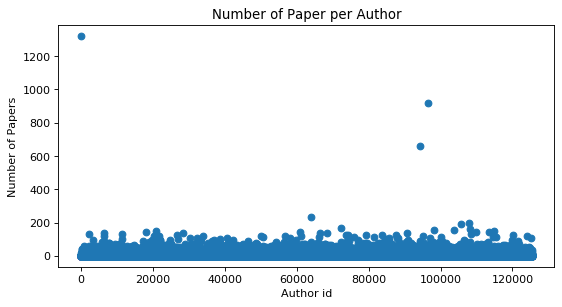

In [10]:
grouped_authors = dblp_authors.groupby("author names").count().reset_index()
plt.figure(num=None, figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel("Author id")
plt.ylabel("Number of Papers")
plt.title("Number of Paper per Author")
plt.scatter(grouped_authors.index, grouped_authors["paper id"]) #in this case we use paper id as amount of papers per author
plt.show()



We ploted all the authors with their respective number of papers as a scatter plot, as that made it easier to identify the presence of outliers. In the plot above we can observe mainly three outliers. After further inspection of the authors we were able to observe that the highest number of papers that an author had, was actually attributed to papers ***without an author*** set in out dataset. The second outlier we found was a woman named ***Sheila A. McIlraith***. She supposedly had approximately 950 papers. The problem however with her was that most of her papers were in the year 2018, and even after the removal of duplicate papers she still had over 900 papers. Thus we removed here as we argued that it is not feasible for a person to publish 2 or more papers per day. The last outlier that we removed was an editor for different papers. We were able to find another individual with the same name without ***ed.*** in the paper. Thus we reasoned that this individual can be removed from the dataset. The resulting author dataset can be observed below. 

In [11]:
#We try to find out who the authors on the outliers are
grouped_authors = grouped_authors[~grouped_authors['author names'].str.contains("ed\.")] # removes editors
grouped_authors = grouped_authors[grouped_authors['author names'] != "" ] #remove papers without authors
grouped_authors = grouped_authors[grouped_authors['author names'] != "Sheila A. McIlraith"] #remove this author as most of the papers are in 2018 bla bla bla
display(grouped_authors.sort_values('paper id', ascending = False))


#clean dblp_papers
dblp_papers = dblp_papers[~dblp_papers['author names'].str.contains("ed\.")] # removes editors
dblp_papers = dblp_papers[dblp_papers['author names'] != "[]" ] #remove papers without authors
dblp_papers = dblp_papers[~dblp_papers['author names'].str.contains("Sheila A. McIlraith") ]


,author names,paper id,publication year,paper title,Conference
63969,Luc Van Gool,234,234,234,234
107948,Toshio Fukuda,196,196,196,196
105771,Thomas S. Huang,190,190,190,190
72265,Michael I. Jordan,168,168,168,168
108115,Trevor Darrell,160,160,160,160
103775,Takeo Kanade,158,158,158,158
98152,Shuicheng Yan,155,155,155,155
114974,Xiaoou Tang,150,150,150,150
20849,Dan Roth,147,147,147,147
18141,Christopher D. Manning,145,145,145,145


***A3.2***

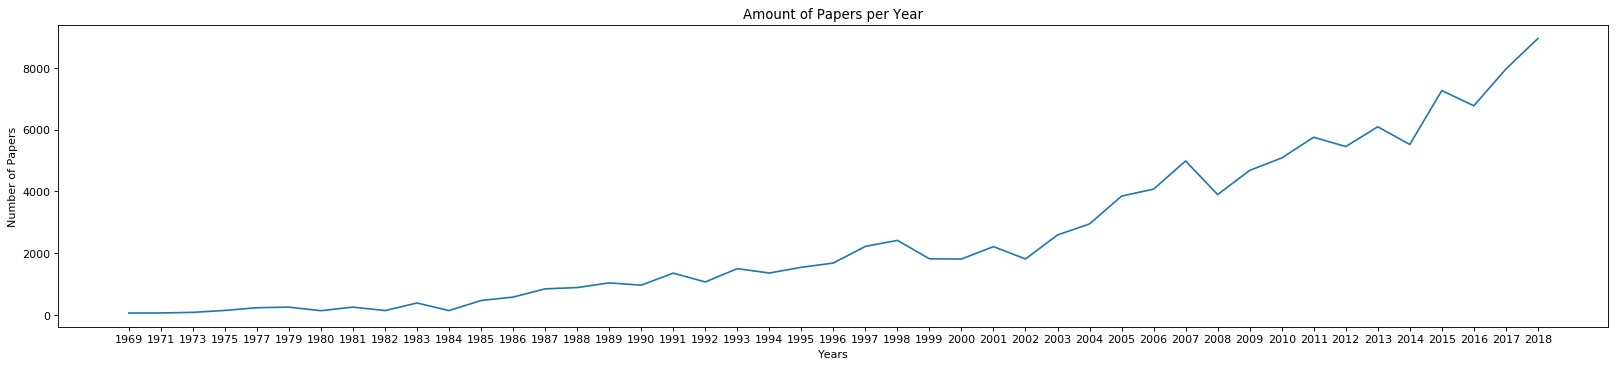

In [12]:
''' Add your code here '''
def filter_year(year):
    digits = re.sub("\D", "", year)
    if(len(digits)>4):
        return digits[0:4]
    elif(len(digits) == 2):
        if(digits[0] == '0' or digits[0] == '1'):
            return '20' + digits
        else:
            return '19' + digits
    else:
        return digits
        
dblp_papers["publication year"] = dblp_papers["publication year"].apply(filter_year)
dblp_papers = dblp_papers[dblp_papers['publication year'] != ''] #removed all publications that do not have a date
grouped_year = dblp_papers.groupby('publication year').count().reset_index()

plt.figure(num=None, figsize=(25, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(grouped_year['publication year'],grouped_year['paper id'])
grouped_year_save=grouped_year.copy()
plt.xlabel("Years")
plt.ylabel("Number of Papers")
plt.title("Amount of Papers per Year")
plt.show()

After we cleaned the data we graphed the number of papers per year as a line chart. This makes it possible to observe the change in the number of papers more intutively. We can observe from the plot above a continued increase in the number number of papers published. We believe that this is possible due to the increased aaccesibility of education to more people. In addition to the development of technology which made it easier for people to do large computations in their research.

***A3.3***

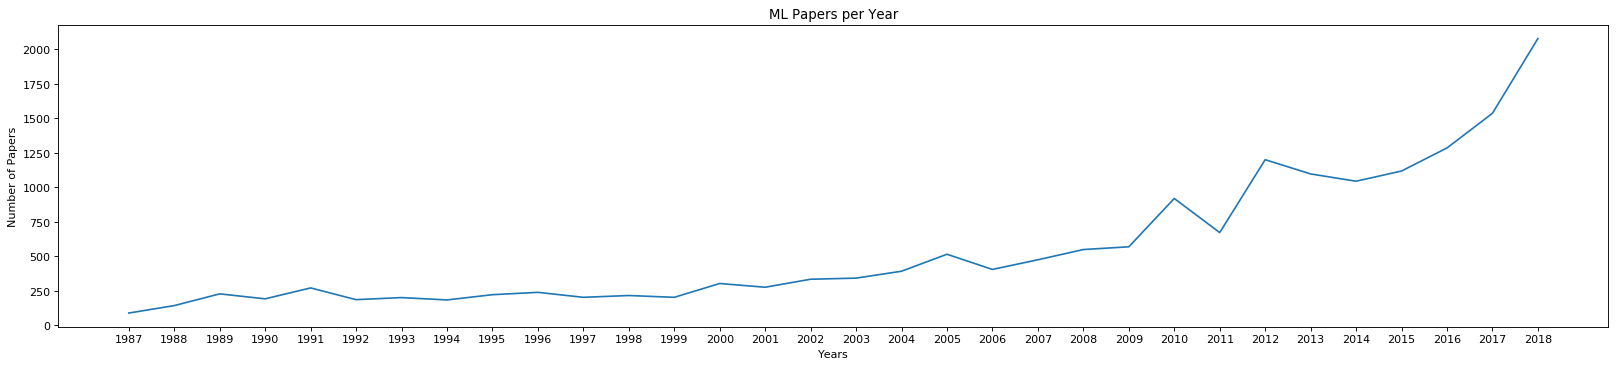

In [13]:
mlconf = ['icml', 'nips']
''' Add your code here '''
ml_papers = dblp_papers[dblp_papers['Conference'].str.contains('icml|nips')]
grouped_year_ml = ml_papers.groupby('publication year').count().reset_index()
plt.figure(num=None, figsize=(25, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(grouped_year_ml['publication year'],grouped_year_ml['paper id'])
year_ml_saved = grouped_year_ml.copy()
plt.xlabel("Years")
plt.ylabel("Number of Papers")
plt.title("ML Papers per Year")
plt.show()

We can observe from the graph above that the number of ML papers has steadily increased, and that in the last few years that increase has been even more apparent. We believe that this is as a result that in the mid-80s, 90s and the beggining of the 21st century the focus on machine learning has been more theoretical, as they did not have a lot of computational power. However we can see that with the improvement of hardware there is a increase in the number of machine learning papers. Reason to that being the new computational power allows researchers to do more work. Furthermore we can see the more rapid increase in the last few years in the number of papers due to it being considered a "Hot Topic", and as such resulting in more people working on it. 

***A3.4***

In [14]:
''' Add your code here '''
r = get('https://papers.nips.cc/') # /ip: Returns the requester's IP Address.

nips_papers = pd.DataFrame(columns = ['paper id', 'author names', 'publication year', 'paper title', 'Conference']) 

main_body = r.text
main_soup = BeautifulSoup(main_body, 'html.parser')
links_papers = main_soup.find_all('ul')[1].find_all('a', href = True)
for link in links_papers:
    currLink = link.get('href')
    currYear = currLink[len(currLink) -4:]
    currPage= get('https://papers.nips.cc' + currLink)
    currSoup = BeautifulSoup(currPage.text, 'html.parser')
    currPapers = currSoup.find_all('ul')[1].find_all('li')
    for paper in currPapers:
        paperTitle = paper.find_all('a')[0].text + '.' #gets paper title
        currAuthors = paper.find_all('a', attrs={'class' : 'author'})
        authorList = []
        for author in currAuthors:
            authorList.append(author.text)
        nips_papers.loc[-1] = ['no id', authorList, currYear, paperTitle, 'nips']
        nips_papers.index = nips_papers.index + 1

nips_papers = nips_papers.sort_index()

In [15]:
dblp_papers = dblp_papers.append(nips_papers)

dblp_papers['author names'] = dblp_papers['author names'].astype(str)


In [16]:

combinedColumns = dblp_papers['author names'] + dblp_papers['publication year'] +dblp_papers['paper title'] + dblp_papers['Conference']
dblp_papers['general identifier'] = combinedColumns
dblp_papers = dblp_papers.drop_duplicates('general identifier')
del dblp_papers['general identifier']

dblp_papers = dblp_papers[dblp_papers['author names'] != '[]'] #removed all publications that do not have a date

#display(dblp_papers.groupby(['author names','publication year','paper title','Conference']).count().sort_values('paper id'))


***A3.2 redone***

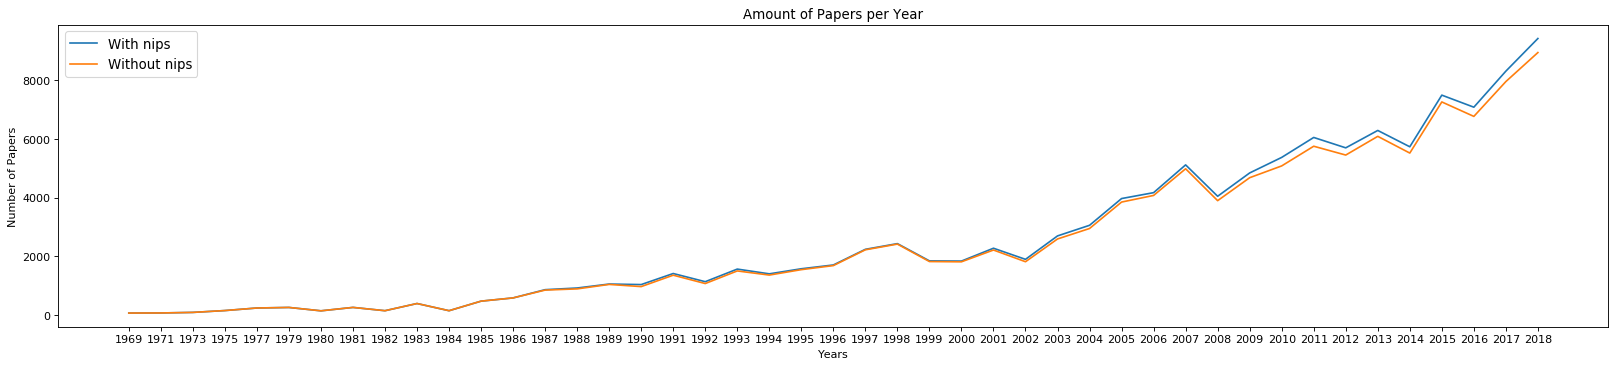

In [17]:
dblp_papers = dblp_papers[dblp_papers['publication year'] != ''] #removed all publications that do not have a date
grouped_year = dblp_papers.groupby('publication year').count().reset_index()
# display(grouped_year)
plt.figure(num=None, figsize=(25, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(grouped_year['publication year'],grouped_year['paper id'])
plt.plot(grouped_year_save['publication year'],grouped_year_save['paper id'])
plt.xlabel("Years")
plt.ylabel("Number of Papers")
plt.title("Amount of Papers per Year")
plt.legend(['With nips','Without nips' ], fontsize = 12)
plt.show()

We graphed both the number of papers without the nips web data and with it. This way it makes it easier to observe any changes. We observe only a small increase in the number of papers published per year. This is simply due to the fact of us missing some nips papers. However this does not affect our previous results radically different as to change our opinion.

***A3.3 redone***

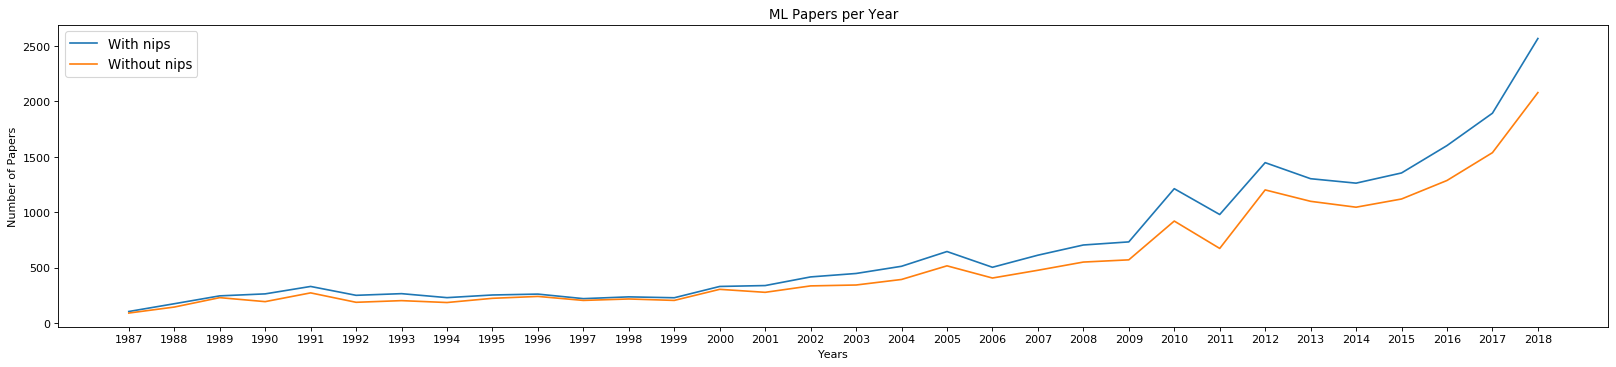

In [18]:
ml_papers = dblp_papers[dblp_papers['Conference'].str.contains('icml|nips')]
grouped_year_ml = ml_papers.groupby('publication year').count().reset_index()
plt.figure(num=None, figsize=(25, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(grouped_year_ml['publication year'],grouped_year_ml['paper id'])
plt.plot(year_ml_saved['publication year'],year_ml_saved['paper id'])
plt.xlabel("Years")
plt.ylabel("Number of Papers")
plt.title("ML Papers per Year")
plt.legend(['With nips','Without nips' ], fontsize = 12)
plt.show(['Simple line'])


Similiar to the previous part the number of nips papers increases the number of papers published through the years. This is especially prevalent here as we only use nips and icml papers for this graph so the new nips papers that we get have more weight in the total number. Nevertheless this does not change the result we get from this graph as it stays similiar to the previous one.

### A4. Author activity

For each author, calculate their normalized paper count, defined as the total number of papers divided by the author’s period of activity. An author’s period of activity is defined as the number of years between the earliest and latest papers of this author. Plot the distribution of the normalized paper count. What is the appropriate scale for the axes? Does the distribution (roughly) follow a particular law, and if yes, which one?

In [19]:
dblp_papers = dblp_papers.reset_index(drop=True)
# Reindex and repeat cols on len of split and reset index.
dblp_authors = dblp_papers.reindex(dblp_papers.index.repeat(dblp_papers['author names'].str.split("', '").apply(len))) 
dblp_authors = dblp_authors.reset_index(drop=True)

#Split on comma, create list of authors and reset index
authors_list = pd.DataFrame(dblp_papers['author names'].str.split("', '").tolist()).stack()
authors_list.reset_index(drop=True, inplace=True)

#Replace columns
dblp_authors['author names'] = authors_list.apply(delete_parantheses)

authors_amount = dblp_authors.groupby(['author names']).count()
authors_max_year = dblp_authors.groupby(['author names']).max()
authors_min_year = dblp_authors.groupby(['author names']).min()

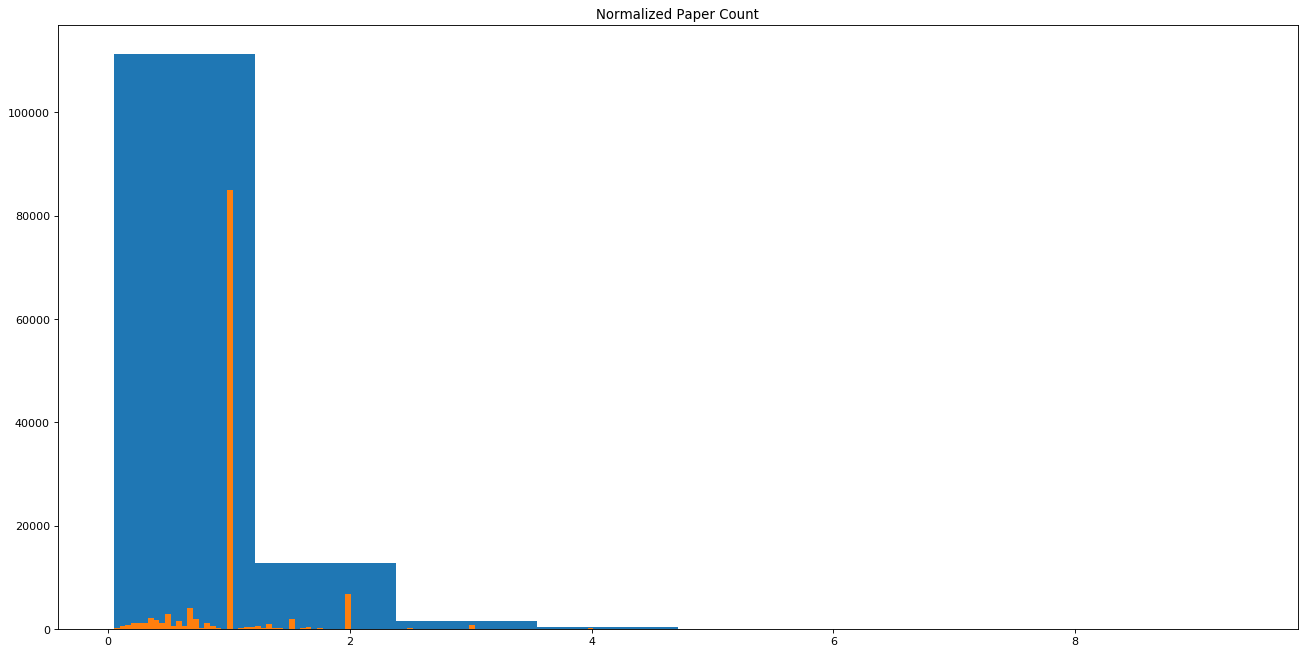

In [20]:
pub_period = authors_max_year['publication year'].astype(int) - authors_min_year['publication year'].astype(int) + 1

norm_paper_count = []
for index, row in authors_amount.iterrows():
    amountPapers = row['paper id'].astype(int)
    period = pub_period[index].astype(int)
    norm_paper_count.append(amountPapers / period)
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
# plt.xscale('log')
# plt.yscale('log')
plt.hist(norm_paper_count,8)
plt.hist(norm_paper_count,200)
plt.title("Normalized Paper Count")
plt.show()

The results of the normalized paper count are displayed in the above histograms. The first one uses less bins and it is colored in blue. It seems to be following the Zipf's Distribution. However when we use more bins to plot the data as represented by the orange bars, then it seems as it is not following a particular well know distribution. From the more granular plot (orange plot) we can see that the highest normalized paper count is 1. This means that most of the authors published a paper per year during their active career. We can also see that some authors published 2 and more papers per year. Furthermore we attribute the high number of authors with a high paper count due to there being students who would publish contribute to a paper and thus have their names in the paper, however they would stop after that. Thus this could represent a reason for the inflation. 

## Task B. Ranking authors

As you may know, there exist rankings for universities, which represent their relative quality and are used to compare the performance of different universities. In the same vein, there are rankings for conferences and journals, which represent the importance and impact of each conference or journal, and therefore allow for approximate comparisons. In this part, you will rank authors based on different aspects of their research output.

### B1. A Naïve Score

In the absence of citation counts, it is hard to objectively rank the authors based on the impact of their contributions to the field of AI research. A naïve way would be to rank them based on their number of published papers. Obtain such a ranking and analyze your result. Identify and explain some obvious limitations of this scheme.

In [21]:
grouped = dblp_authors.groupby('author names').count().reset_index()

grouped = grouped.drop(['publication year','paper title','Conference'], axis = 1)
grouped.rename(columns={'paper id':'paper rank'},inplace=True)

grouped = grouped.sort_values('paper rank', ascending=False).reset_index().drop('index',axis=1)

### B2. H5-index

Another way to score and rank authors could be based on the quality of the conferences and journals where they publish their papers. For this task, you have to use the H5-index score from AMiner (https://aminer.org/ranks/conf) (another database of scholarly publications), which captures the quality of academic conferences: the higher the H5-index, the better the conference.
1. Load the AMiner dataset ( *'aminer_ai.tsv'* available in the folder ``data/``), which contains H5-index values for AI conferences. Load it into a new Pandas dataframe, and join it with the author-centric DBLP dataframe.
2. Calculate a *'new'* author ranking (give each author a score, by which the authors are then sorted in order to obtain the ranking), where each author's score is the sum of the H5-indices of all their papers (the H5-index of a paper being the H5-index of the conference it is published in).
3. Analyze your new, H5-index-based author ranking and explain how and why your results are different from the previous ranking. Do you see any differences in the top-20 authors based on the H5-index-based ranking and the one produced using publication counts? If yes, list the authors that are ranked in the top 20 based on publication counts but absent in the top 20 based on the H5-index-based ranking. Identify the ranks of these authors in the ranking produced by the H5-index based ranking scheme.
4. Now, take the authors in the file `data/list_of_selected_authors.txt`, and compute their rankings using the two (naïve and H5-index-based) ranking schemes. What do you observe? Explain the potential dangers of the naïve, paper-count-based score.
5. On the flip side, do you see any potential dangers of using the H5-index-based score?   
_Hint: Analyze the conferences in which the top ranked authors publish. Investigate the effect of the conferences in which these authors publish more frequently on the obtained ranking._

***B2.1***

In [22]:
aminer = pd.read_csv('data/aminer_ai.csv', sep=';')
aminer["Short Name"] = aminer["Short Name"].str.lower()
merged_aminer = pd.merge(aminer, dblp_authors, left_on='Short Name', right_on='Conference')
merged_aminer

,Rank,Conference (Full Name),Short Name,H5-Index,paper id,author names,publication year,paper title,Conference
0,1,IEEE Conference on Computer Vision and Pattern...,cvpr,112,conf/cvpr/BonetV98,Jeremy S. De Bonet,1998,Texture Recognition Using a Non-Parametric Mul...,cvpr
1,1,IEEE Conference on Computer Vision and Pattern...,cvpr,112,conf/cvpr/BonetV98,Paul A. Viola,1998,Texture Recognition Using a Non-Parametric Mul...,cvpr
2,1,IEEE Conference on Computer Vision and Pattern...,cvpr,112,conf/cvpr/KonishiYCZ99,Scott Konishi,1999,Fundamental Bounds on Edge Detection: An Infor...,cvpr
3,1,IEEE Conference on Computer Vision and Pattern...,cvpr,112,conf/cvpr/KonishiYCZ99,Alan L. Yuille,1999,Fundamental Bounds on Edge Detection: An Infor...,cvpr
4,1,IEEE Conference on Computer Vision and Pattern...,cvpr,112,conf/cvpr/KonishiYCZ99,James M. Coughlan,1999,Fundamental Bounds on Edge Detection: An Infor...,cvpr
5,1,IEEE Conference on Computer Vision and Pattern...,cvpr,112,conf/cvpr/KonishiYCZ99,Song Chun Zhu,1999,Fundamental Bounds on Edge Detection: An Infor...,cvpr
6,1,IEEE Conference on Computer Vision and Pattern...,cvpr,112,conf/cvpr/RennoMJ07,John-Paul Renno,2007,Object Classification in Visual Surveillance U...,cvpr
7,1,IEEE Conference on Computer Vision and Pattern...,cvpr,112,conf/cvpr/RennoMJ07,Dimitrios Makris,2007,Object Classification in Visual Surveillance U...,cvpr
8,1,IEEE Conference on Computer Vision and Pattern...,cvpr,112,conf/cvpr/RennoMJ07,Graeme A. Jones,2007,Object Classification in Visual Surveillance U...,cvpr
9,1,IEEE Conference on Computer Vision and Pattern...,cvpr,112,conf/cvpr/ZhangWBLL18,Shifeng Zhang,2018,Single-Shot Refinement Neural Network for Obje...,cvpr


***B2.2***

In [23]:
''' Add your code here '''
rankings = merged_aminer.groupby('author names')[['H5-Index']].sum()
rankings = rankings.sort_values('H5-Index', ascending=False).reset_index()
rankings.rename(columns={'H5-Index':'paper rank'},inplace=True)
rankings

,author names,paper rank
0,Luc Van Gool,19368
1,Thomas S. Huang,14211
2,Trevor Darrell,13284
3,Xiaoou Tang,13204
4,Shuicheng Yan,12615
5,Michael I. Jordan,11491
6,Toshio Fukuda,11368
7,Marc Pollefeys,11262
8,Larry S. Davis,11199
9,Martial Hebert,10905


***B2.3***

In [24]:
#based on h5
top_rankings = rankings.head(20).reset_index()
#based on paper count
top_grouped = grouped.head(20).reset_index()

display(top_rankings)
display(top_grouped)

#authors that are in paper count ranking but not in h5-index
pd.concat([top_grouped, top_rankings,top_rankings]).drop_duplicates(subset='author names',keep=False)

,index,author names,paper rank
0,0,Luc Van Gool,19368
1,1,Thomas S. Huang,14211
2,2,Trevor Darrell,13284
3,3,Xiaoou Tang,13204
4,4,Shuicheng Yan,12615
5,5,Michael I. Jordan,11491
6,6,Toshio Fukuda,11368
7,7,Marc Pollefeys,11262
8,8,Larry S. Davis,11199
9,9,Martial Hebert,10905


,index,author names,paper rank
0,0,Luc Van Gool,231
1,1,Michael I. Jordan,219
2,2,Toshio Fukuda,196
3,3,Thomas S. Huang,190
4,4,Bernhard Schölkopf,172
5,5,Trevor Darrell,169
6,6,Shuicheng Yan,157
7,7,Takeo Kanade,156
8,8,Eric P. Xing,156
9,9,Yoshua Bengio,152


,index,author names,paper rank
4,4,Bernhard Schölkopf,172
8,8,Eric P. Xing,156
9,9,Yoshua Bengio,152
10,10,Christopher D. Manning,151
13,13,Wolfram Burgard,144
14,14,Dan Roth,144
16,16,Vijay Kumar 0001,143
19,19,Dan Klein,138


The results obtained from using the H5-index-based author ranking differ from the ranking obtained by the sum of the publication counts. This difference is due to giving a higher ranking to authors who have published their papers in conferences with higher H5-indices. When the ranking is based on H5-Indices, we observe that the number of papers does not necessarily correlate with the ranking of the author. This is because some of the papers are published in low H5-Indexed conferences. We can see a difference in top-20 authors based on the H5-Index ranking and the one produced by publication counts. 

There are 8 authors (which can be observed above) that are in the publication count based ranking but not in the h5-index based ranking. When we look at the conferences that these authors published, they are not the top-scored conferences. Hence, their publications can not get these authors in top20 of H5-Index ranking.

***B2.4***

In [25]:
''' Add your code here '''
lines = open("data/list_of_selected_authors.txt", 'r')
lines = lines.read().split('\n')

#based on h5index
display(rankings.loc[rankings['author names'].isin(lines)])

#based on paper count
display(grouped.loc[grouped['author names'].isin(lines)])

,author names,paper rank
10485,Naokazu Yokoya,332
16009,Yukihiro Nakamura,226
21913,Steffen Abraham,170
22086,Parag Havaldar,170
22267,Charles Freundlich,170
22450,Iljung S. Kwak,170
22563,Hy Murveit,170
25286,Sebastian Otte,148
26189,Mengjie Zhang,140
26608,Jianwu Dang,134


,author names,paper rank
2655,Hy Murveit,17
3728,Naokazu Yokoya,14
3995,Mengjie Zhang,13
5569,Jianwu Dang,10
6111,Sebastian Otte,10
25483,Yukihiro Nakamura,3
31733,Steffen Abraham,2
33116,Iljung S. Kwak,2
38061,Parag Havaldar,2
46548,Charles Freundlich,2



The naive, paper-count-based score is not a good indicator of the ranking of an author. A high number of publications of an author does not necessarily correlate with the impact and importance of the publication. An author with a few number of publications could impact the field more than an author with numerous publications. So, one of the dangers of using the naive, paper-count-based score would be giving unjust advantaged toward the authors that publish many papers that might not necessarily be high in quality and scientific impact.

In the listings above, we can observe that authors with 2 and 3 papers are high in the h5-index based conferences. Which shows that they are actually new in the field but still they produced high quality papers. H5-Index can be dangerous in the sense that it can disregard the experience of the researcher and just considers the importance of the conference.

Some potential dangers also include giving advantage to authors that co-authored many publications. This happens frequently when an experienced professor works with their advisees, so they end up having many publications per year.


***B2.5***

The H5-indices of the conferences differ vastly. For example, CVPR, which is the highest H5-indexed conference, has an H5-index of 112, whereas Expert Syst. Appl., which is the third highest H5-indexed conference, has an H5-index of 58. This shows that even a little difference in the ranking of the conferences can mean a large difference in their H5-indices, which may lead to a large difference in the ranking of the authors. 

Moreover, some conferences are very specific to certain topics. For example, CVPR, which is the conference with the highest H5-index, is on Computer Vision and Pattern Recognition, TPAMI, which is the conference with the second highest H5-index, is on pattern analysis and machine intelligence. So, if an author does not publish a paper in the fields of these two conferences, they become extremely disadvantaged.

We can observe that the top ranked authors publish more frequently in the top H5-indexed conferences. This shows that if an author can publish their papers in the top-ranked conferences, they get highly advantaged over those that could not. Because of the aforementioned reasons, i.e. the vast difference between the points of the conferences and the specific topics of each conference, this ranking is still biased.

### B3. And Justice For All

An ideal ranking scheme should not give undue advantage to authors who have been conducting research for a longer period of time and therefore have naturally published more papers when compared to a junior researcher. Does the ranking scheme designed by you in ``Step 2`` take this factor into account? If not, introduce variations in your ranking scheme to mitigate this effect. Do you observe anything odd with this new ranking? Clearly explain your observations.

_Hint: What you did in part A4 may be useful here._

In [26]:
period = pd.DataFrame(pub_period).reset_index()
period.rename(columns={'publication year' : 'period'}, inplace=True)
summedH5 = merged_aminer.groupby('author names').sum()

fairRank = []
for index, row in summedH5.iterrows():
    tmpList = []
    h5value = row['H5-Index'].astype(int)
    period = pub_period[index].astype(int)
    tmpList.append(index)
    tmpList.append(h5value / period)
    fairRank.append(tmpList)
display(pd.DataFrame(fairRank,columns=['names','h5sum']).sort_values('h5sum', ascending=False))

,names,h5sum
115796,Xiaoou Tang,825.250000
98900,Shuicheng Yan,742.058824
49202,Jiashi Feng,711.625000
64474,Luc Van Gool,667.862069
115401,Xiaodan Liang,642.000000
115497,Xiaogang Wang,632.750000
101308,Stefanos Zafeiriou,554.500000
88675,Raquel Urtasun,535.823529
50366,Jinshan Pan,503.000000
74742,Ming-Hsuan Yang 0001,495.428571


The H5-based ranking scheme we designed in Step 2 does not take into account the number of years the author has been conducting research. We used the sum of the H5-indices of all papers of the author divided by the author’s active years as our ranking scheme. We aimed to reduce the disadvantage of the newcomers in the research field. Using this new ranking scheme, the top-author switched ranks with the 4th-ranked author. The 2nd-ranked author using the old scheme is now not even in the top 20. The 5th-ranked author using the old scheme is now ranked 2nd.  We can observe many new names using our new ranking scheme.

## Task C. Trending topics

Historically, the field of AI has witnessed research in two broad flavors: “symbolic” (logic, planning, control, etc.) vs. “connectionist” (neural networks, deep learning, Bayesian methods, etc.). Let’s see if we can see how the popularity of these two approaches to AI is reflected in the DBLP data.

To this end, construct two dataframes: ``symbolic`` and ``connectionist``. ``symbolic`` is your paper-centric dataframe from part A1 filtered down to those papers whose titles contain at least one of the following words (not differentiating between upper and lower case letters): “logic”, “planning”, “control”; ``connectionist`` is a dataframe constructed in a similar manner, but with the words “deep”, “learning”, “feature”, “bayesian”. Plot the number of papers per year for ``symbolic`` and ``connectionist`` separately (i.e., 2 plots).
1. Describe the trends you observe. Based on these plots alone, what might one conclude about the popularity of the two approaches to AI?
2. Moving beyond these plots, what do you, as a careful data scientist, conclude about the popularity of symbolic vs. connectionist AI? Corroborate your reasoning with further plots.

_Note: You could use the text handling utilities below to clean the text in the paper titles._

In [27]:
# Text handling utilities
from string import punctuation
stopwords_list = open('data/stopwords.txt', 'r').readlines()
stopwords_list = [x.strip() for x in stopwords_list]
def stopword_remover(text):
    text_list = text.split()
    text_list = [x for x in text_list if x not in stopwords_list]
    return ' '.join(text_list)
def lowercase_all(text):
    return text.lower()
def remove_punct(text):
    return ''.join([ch for ch in text if ch not in punctuation])

In [28]:
''' Add your code here '''
#Creates the dataframe for Symbolic papers
symbolic = dblp_papers.copy(deep = True)
symbolic = symbolic[symbolic['paper title'].str.lower().str.contains('logic|planning|control')]
symbolic = symbolic[symbolic['publication year'] != '']

#Creates the dataframe for Connectionist papers
connectionist = dblp_papers.copy(deep = True)
connectionist = connectionist[connectionist['paper title'].str.lower().str.contains('deep|learning|feature|bayesian')]
connectionist = connectionist[connectionist['publication year'] != '']

## Symbolic vs. connectionist trends

Based on the plots shown, we see a rising trend in both subfields of Aritificial Intelligence.
We can observe two major differences between the plots.
First, even though the two plots look similar, the scales are different. The maximum number of papers in one year for the symbolic papers was 531 whereas for the connectionist subfield, the most papers written in one year is 2567 which is around six time more.
Second, we observe an exponential increase of the Connectionist papers in the recent years.
Looking at the graphs we can conclude that nowadays, the connectionist subfield is more polular, however the comparison of the two trends on one graph will provide us more insight.

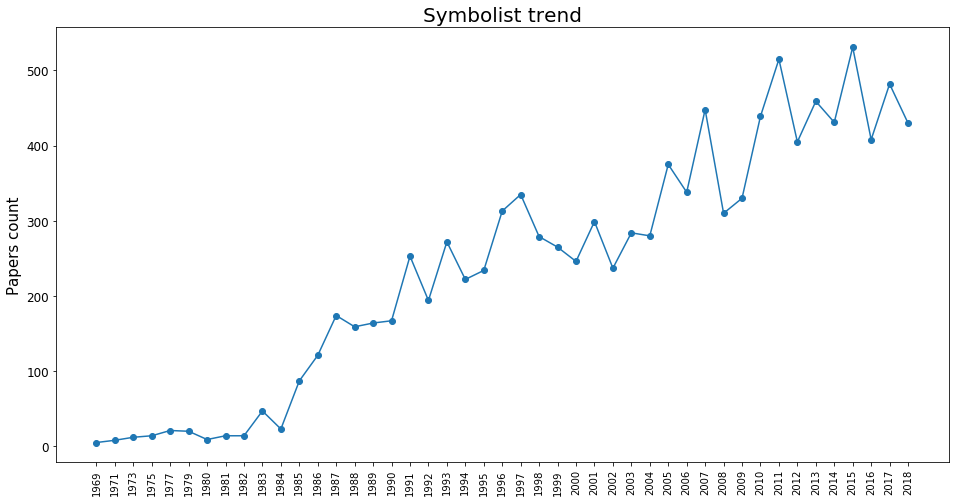

In [29]:
#------------Plot symbolic graph-------------------#
grouped_symbolic = symbolic.groupby('publication year').count().reset_index()
plt.figure(figsize=(16,8))
plt.title('Symbolist trend', size = 20)
plt.plot(grouped_symbolic['publication year'], grouped_symbolic['paper title'], marker = 'o')

plt.ylabel("Papers count", fontsize = 15)
plt.xticks(rotation='vertical')
plt.yticks(size = 12)
plt.xticks(rotation='vertical')
plt.show()

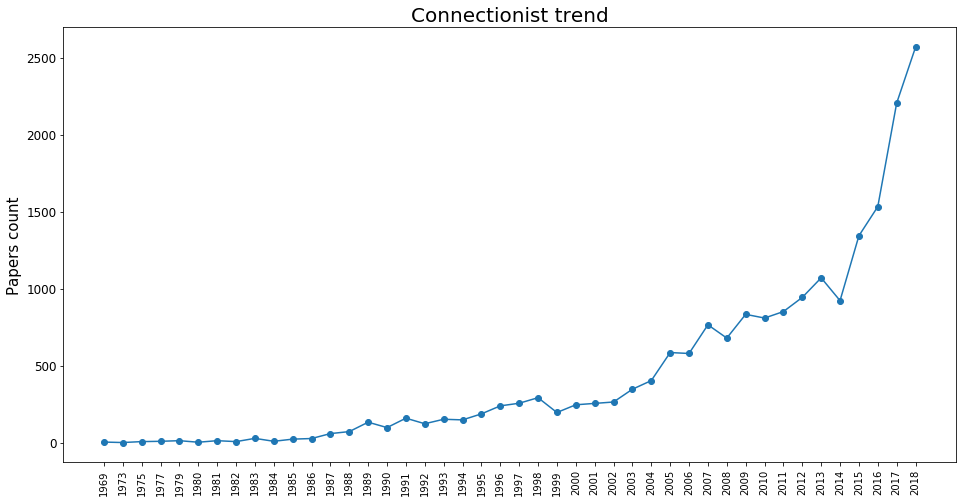

In [30]:
#------------Plot Connectionist graph-------------------#
grouped_connectionist = connectionist.groupby('publication year').count().reset_index()
plt.figure(figsize=(16,8))
plt.title('Connectionist trend', size = 20)
plt.plot(grouped_connectionist['publication year'], grouped_connectionist['paper title'], marker ='o')

plt.ylabel("Papers count", fontsize = 15)
plt.xticks(rotation='vertical')
plt.yticks(size = 12)
plt.xticks(rotation='vertical')
plt.show()

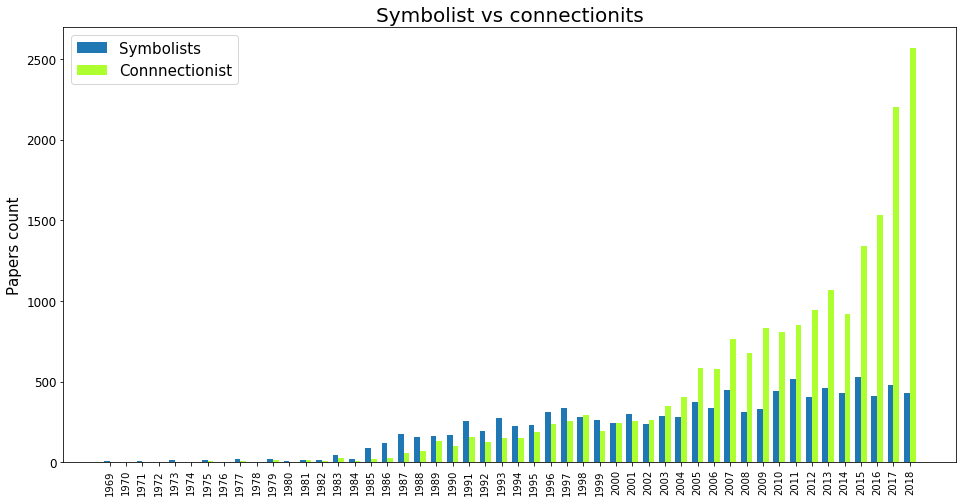

In [31]:
#----------------Comparison of the two trends--------------------#

papers_symbolist = []
papers_connectionist = []
years = []

#------------Fill in zeros for missing years in data-----------------#
for year in range(1969, 2019):
    years.append(year)
    found_year = False
    for i in range(len(grouped_connectionist['publication year'])):
        if(str(year) == grouped_connectionist['publication year'][i]):
            papers_connectionist.append(grouped_connectionist['paper title'][i])
            found_year = True
            break
    if(found_year == False):
        papers_connectionist.append(0)
        
    found_year = False
    for i in range(len(grouped_symbolic['publication year'])):
        if(str(year) == grouped_symbolic['publication year'][i]):
            papers_symbolist.append(grouped_symbolic['paper title'][i])
            found_year = True
            break
    if(found_year == False):
        papers_symbolist.append(0)
        
#-----------------------------END------------------------------------#

#-------------------------Figure plotting----------------------------#

N = len(years)
fig, ax = plt.subplots(figsize = (16,8))

ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars

p1 = ax.bar(ind, papers_symbolist, width, bottom=0)
p2 = ax.bar(ind + width, papers_connectionist, width, bottom=0, color = 'greenyellow')

ax.set_title('Symbolist vs connectionits', size = 20)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(years)
ax.set_ylabel("Papers count", fontsize = 15)

ax.legend((p1[0], p2[0]), ('Symbolists', 'Connnectionist'), fontsize = 15)
plt.xticks(rotation='vertical')
plt.yticks(size = 12)
ax.autoscale_view()

plt.show()

#-------------------------END Figure plotting-------------------------#

## Additional bar plot comparison

Combination of both trends side by side in a bar plot allows us to compare their evolution throughout the years. For the years with no papers in our database we set it to 0.

From 1969 to 1984 the popularity of both trends was slowly increasing. From 1984 to 1997 the Symbolist trend was more popular but the Connectionist trend was slowly catching up. In 2002 the number of papers was equal and since then the deep learning trend of Connectionists has taken over. We can even constate an exponential increase from 2014 to 2018.

With a bit of background of information we know that in 1969 the publication of a book “Perceptrons” by marvin Minsky which argued that single perception approach to neural networks could not be translated effectively into multi-layered neural networks, effectively burryied the field of neural networks for 12 years. This changed in 1982 with the introduction of Hopfield nets and first International Conference on Neural Networks by the Institute of Electrical and Electronic Engineers (IEEE) in 1987. We can observe the double increase of the papers from 1986 to 1987 from 27 to 59. The versatility of NN allowed it to gain major popularity in the AI field.

Our last plot shows us the ratio between the number of papers regarding Symbolist and Connectionist topics. We can clearly observe that during every year after 2003, more papers have talked about Connectionist themes. We can conclude that even though the Symbolist approach has been more popular until 2003, the topic of Neural Networks is more popular nowadays.


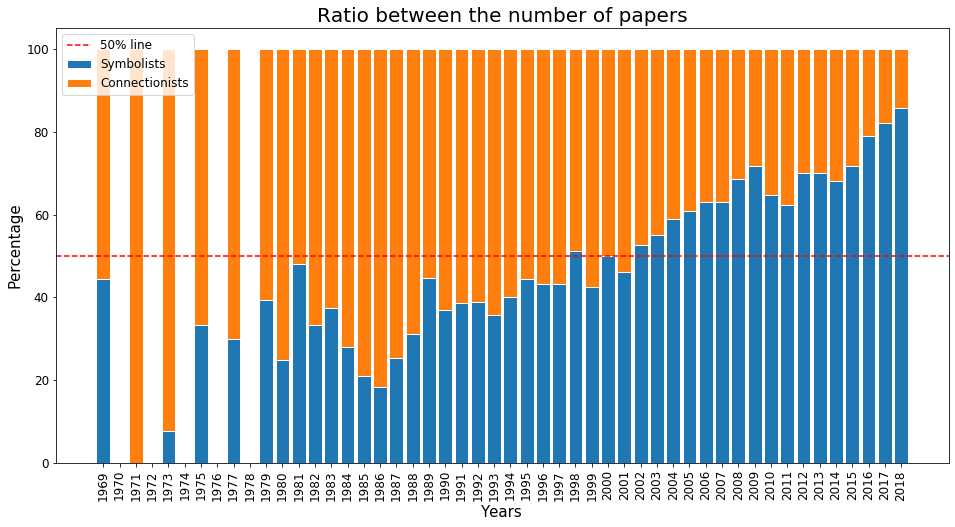

In [32]:
#---------Ratio comparison of the two trends--------#
plt.figure(figsize=(16,8))

# From data to percentage
totals = [i+j for i,j in zip(papers_symbolist, papers_connectionist)]
totals = [x if x > 0 else 1 for x in totals]
greenBars = [i / j * 100 for i,j in zip(papers_connectionist, totals)]
orangeBars = [i / j * 100 for i,j in zip(papers_symbolist, totals)]
 
#---------------Plotting--------------------------#
barWidth = 0.85
# Create connectionists Bars
plt.bar(years, greenBars, edgecolor='white', width=barWidth)
# Create symbolist Bars
plt.bar(years, orangeBars, bottom=greenBars, edgecolor='white', width=barWidth)


plt.title('Ratio between the number of papers', size = 20)
plt.xticks(years, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xticks(rotation='vertical')
plt.xlabel('Years', fontsize = 15)
plt.ylabel('Percentage', fontsize = 15)
plt.axhline(y=50, color='r', linestyle='--')
plt.legend(['50% line','Symbolists','Connectionists' ], fontsize = 12)
plt.show()

#------------------------END Figure plotting------------------------#
